# <font color='green'> Logistic Regression :</font>

**Logistic Regression** is a statistical method used to cheking the relationship between one or more independent variables and a binary dependent variable (outcome) that takes on two possible outcomes (categorical values).

**Example:--** 

- success/failure
- yes/no
- Pass/Fail, 
- 0/1

- **Logistic regression** predicts the probability that the dependent variable belongs to a particular category (usually coded as 0 or 1).

### Types of Logistic Regression

- Binary: Two outcomes (yes/no, spam/not spam).


- Multinomial: Three or more unordered outcomes (StateA/StateB/StateC).


- Ordinal: Three or more ordered outcomes (low/medium/high).

**The logistic function is defined as**

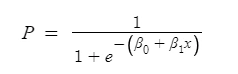

- **β0**  intercept Term

- **β1**  are the coefficients 

- **x1,X2**  are the independent variables

- **P** is the Pridict

**AIM** we want to predict whether a passenger on Titanic survived or not.

## 1- Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 2. Loading data

In [2]:
data=pd.read_csv("C:/Users/USER/Desktop/M.L Data Set/train (2).csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- The three columns i.e Age, cabin and Embarked have missing values.



-  **Cabin column:--** we have lots of null values so it is better to remove it



- **Age:--**  we have  total  177 null values,We can  replace  with the help of Median.


-  **Embarked:--** having 2  missing values, fills the missing values in the Embarked column with the most frequent category (the mode) from that column in the  data.  



In [5]:
data.drop("Cabin",inplace=True,axis=1)

In [6]:
data["Age"].fillna(data["Age"].median(skipna=True), inplace=True)

In [7]:
data["Embarked"].fillna(data['Embarked'].value_counts().idxmax(), inplace=True)

In [8]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now we dont have Null values in Our data

In [9]:
data.shape

(891, 11)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## 3.Exploratory Data Analysis(EDA)

In [11]:
col_names = data.columns

col_names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [12]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

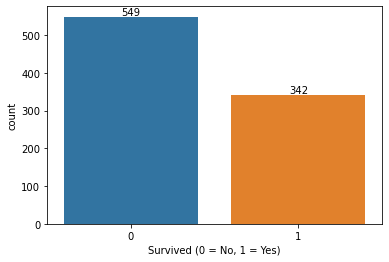

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='Survived', data=data)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()


A total of 549 people died and 342 people survived.

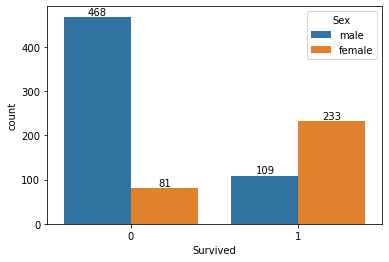

In [14]:
ax = sns.countplot(x='Survived', hue='Sex', data=data)

# Add labels manually for each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position
            height,  # Y position
            f'{int(height)}',  # Label text
            ha='center', va='bottom'  # Center the text horizontally, place it slightly above the bar
        )

plt.show()


We can see that more females survived compared to males, while more males died.

Let’s see how many people **survived divided by class.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

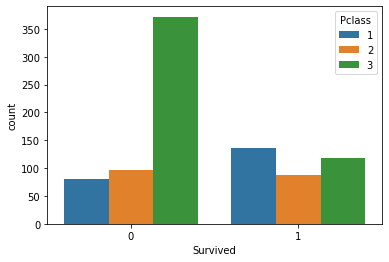

In [15]:
sns.countplot(x = 'Survived',hue = 'Pclass',data = data)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

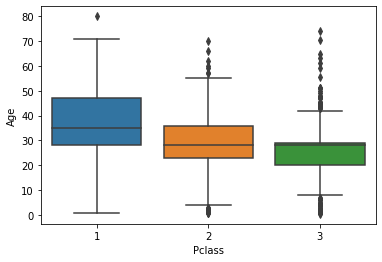

In [16]:
sns.boxplot(x='Pclass',y='Age',data=data)

In [17]:
data.drop(["Name","PassengerId","Ticket"],axis=1,inplace=True)

## 3. Handling Categorical Features

In [18]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Here 2 categorical variables presented  Sex and Embarked.

In [19]:
data=pd.get_dummies(data,["Sex","Embarked"])
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


## 4. Train Test Split

In [20]:
Y=data["Survived"]
X=data.drop("Survived",axis=1)
print(X.shape, Y.shape)

(891, 10) (891,)


In [21]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.20,random_state=42)


print("train data shape:", x_train.shape)
print("train target data shape:",x_train.shape)
print("test data shape:",x_test.shape)
print("test target data shape:",y_test.shape)

train data shape: (712, 10)
train target data shape: (712, 10)
test data shape: (179, 10)
test target data shape: (179,)


### 5.Making predictions and measuring accuracy

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

**predict_proba** method gives the probabilities for the target variable(0 and 1)


0 is for probability of died and 1 is for probability survived

In [24]:
# probability of getting output as 0 - died

lr.predict_proba(x_test)[:,0]

array([0.93678737, 0.95233201, 0.82406193, 0.9672697 , 0.37315782,
       0.55409098, 0.24165713, 0.68355482, 0.64717005, 0.84708267,
       0.86584184, 0.9166208 , 0.39823385, 0.75955592, 0.5684872 ,
       0.85159426, 0.64127415, 0.90812815, 0.86555615, 0.22758863,
       0.90812815, 0.22808451, 0.91446024, 0.56643166, 0.91137921,
       0.0344175 , 0.86584184, 0.75522884, 0.8601777 , 0.85343543,
       0.92594976, 0.04898255, 0.89625039, 0.89792788, 0.87258441,
       0.8506317 , 0.84668173, 0.68042263, 0.86584184, 0.16021679,
       0.8848428 , 0.03268166, 0.87990121, 0.13215469, 0.23111329,
       0.88257307, 0.90783681, 0.59700375, 0.21655985, 0.14134453,
       0.07522087, 0.4075871 , 0.31003264, 0.76992314, 0.23715195,
       0.90137789, 0.92902667, 0.59362689, 0.34360872, 0.58398818,
       0.35367257, 0.3091336 , 0.86074381, 0.86782576, 0.61030575,
       0.45281996, 0.05175   , 0.92297046, 0.79950011, 0.74099639,
       0.26640172, 0.85559792, 0.35251522, 0.04010968, 0.80305

In [25]:
# probability of getting output as 1  survived

lr.predict_proba(x_test)[:,1]

array([0.06321263, 0.04766799, 0.17593807, 0.0327303 , 0.62684218,
       0.44590902, 0.75834287, 0.31644518, 0.35282995, 0.15291733,
       0.13415816, 0.0833792 , 0.60176615, 0.24044408, 0.4315128 ,
       0.14840574, 0.35872585, 0.09187185, 0.13444385, 0.77241137,
       0.09187185, 0.77191549, 0.08553976, 0.43356834, 0.08862079,
       0.9655825 , 0.13415816, 0.24477116, 0.1398223 , 0.14656457,
       0.07405024, 0.95101745, 0.10374961, 0.10207212, 0.12741559,
       0.1493683 , 0.15331827, 0.31957737, 0.13415816, 0.83978321,
       0.1151572 , 0.96731834, 0.12009879, 0.86784531, 0.76888671,
       0.11742693, 0.09216319, 0.40299625, 0.78344015, 0.85865547,
       0.92477913, 0.5924129 , 0.68996736, 0.23007686, 0.76284805,
       0.09862211, 0.07097333, 0.40637311, 0.65639128, 0.41601182,
       0.64632743, 0.6908664 , 0.13925619, 0.13217424, 0.38969425,
       0.54718004, 0.94825   , 0.07702954, 0.20049989, 0.25900361,
       0.73359828, 0.14440208, 0.64748478, 0.95989032, 0.19694

### 6. Model Evavuation

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy=accuracy_score(y_test,y_pred)

print("Test accuracy of the model is :", np.round(accuracy*100,4),"%")

Test accuracy of the model is : 80.4469 %


In [27]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(lr.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(lr.score(x_test, y_test)))

Training set score: 0.8062
Test set score: 0.8045


The difference between the **training score (0.8006) and the test score (0.7933) is small (about 0.0073).** This suggests that Our model is well and is not overfitting significantly.

In [28]:
cml=confusion_matrix(y_test,y_pred)

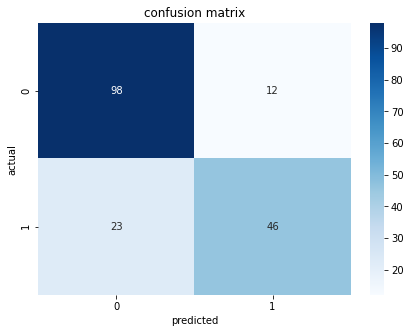

In [29]:
plt.figure(figsize=(7,5))

sns.heatmap(cml,annot=True,fmt="d",cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

### 7.Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test, y_pred)

array([[98, 12],
       [23, 46]], dtype=int64)

In [32]:
TN = 96
FP = 14
FN =23
TP = 46

In [33]:
y_test

565    0
160    0
553    1
860    0
241    1
      ..
880    1
91     0
883    0
473    1
637    0
Name: Survived, Length: 179, dtype: int64

In [34]:
type(y_test)

pandas.core.series.Series

In [35]:
y_test.count

<bound method Series.count of 565    0
160    0
553    1
860    0
241    1
      ..
880    1
91     0
883    0
473    1
637    0
Name: Survived, Length: 179, dtype: int64>

In [36]:
# Assuming y_test is a NumPy array or a similar structure
y_test_df = pd.DataFrame(y_test, columns=['Survived'])

In [37]:
#  Assuming y_test_df is our DataFrame with the target column named 'Survived'

y_test_df.value_counts()

Survived
0           110
1            69
dtype: int64

In [38]:
# Calculate the ratios
zero_ratio = 110 / 179
print('0 (dead) ratio: %{:.0f}'.format(zero_ratio * 100))

one_ratio = 69 / 179
print('1 (survived) ratio: %{:.0f}'.format(one_ratio * 100))

0 (dead) ratio: %61
1 (survived) ratio: %39


In [39]:
# Assuming the class distribution is as follows:
# - Class 0 (dead): 100 instances
# - Class 1 (survived): 69 instances

null_accuracy = 100 / (100 + 69)
null_accuracy

0.591715976331361

comparing manual_accuracy and  Scikit-learn Accuracy Score

In [40]:
# Assuming TP, TN, FP, and FN are defined
#TP = 69  # True Positives (Survived)
#TN = 110  # True Negatives (Dead)
#FP = 0  # False Positives
#FN = 0  # False Negatives

# Calculate accuracy
manual_accuracy = (TP + TN) / (TP + FP + FN + TN)
print('Manually Calculated Accuracy Score: {:.4f}'.format(manual_accuracy))

Manually Calculated Accuracy Score: 0.7933


In [41]:
# from sklearn.metrics import accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels
accuracy = accuracy_score(y_test, y_pred)
print('Scikit-learn Accuracy Score: {:.4f}'.format(accuracy))


Scikit-learn Accuracy Score: 0.8045


### 7.1 Precision


Precision is calculated as the ratio of true positives to the sum of true positives and false positives.

In [42]:
# Assuming TP and FP are defined
#TP = 69  # True Positives
#FP = 0   # False Positives

# Calculate precision
precision_manual = TP / (TP + FP) if (TP + FP) > 0 else 0  # Avoid division by zero
print('Manual Precision: {:.2f}%'.format(precision_manual * 100))

Manual Precision: 76.67%


In [43]:
from sklearn.metrics import precision_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels
precision = precision_score(y_test, y_pred)
print('Precision Score: {:.2f}%'.format(precision * 100))

Precision Score: 79.31%


### 7.2 Recall


Recall is calculated as the ratio of true positives to the sum of true positives and false negatives.

In [44]:
# Assuming TP and FN are defined
#$TP = 69  # True Positives
#FN = 0   # False Negatives

# Calculate recall
recall_manual = TP / (TP + FN) if (TP + FN) > 0 else 0  # Avoid division by zero
print('Manual Recall: {:.2f}%'.format(recall_manual * 100))

Manual Recall: 66.67%


In [45]:
from sklearn.metrics import recall_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels
recall = recall_score(y_test, y_pred)
print('Recall Score: {:.2f}%'.format(recall * 100))

Recall Score: 66.67%


### 7.3 F1 Score

In [46]:
# Assuming precision and recall are defined
precision = 0.8  # Example value for precision
recall = 0.7     # Example value for recall

# Calculate F1 score
f1_manual = 2 * (precision * recall) / (precision + recall) 
print('Manual F1 Score: {:.2f}%'.format(f1_manual * 100))


Manual F1 Score: 74.67%


In [47]:
from sklearn.metrics import f1_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels
f1 = f1_score(y_test, y_pred)
print('F1 Score: {:.2f}%'.format(f1 * 100))


F1 Score: 72.44%


## 8. Hyperparameter tuning

In [48]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV

model=LogisticRegression()

In [49]:

hyperparameter={"C":[0.0001,0.001,0.01,0.1,1,10]}
search= RandomizedSearchCV(model,hyperparameter,scoring="accuracy",
                           random_state=0)
search.fit(x_train,y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
                   random_state=0, scoring='accuracy')

In [50]:
search.cv_results_

{'mean_fit_time': array([0.02211123, 0.02918   , 0.04807487, 0.05832686, 0.05324612,
        0.05439291]),
 'std_fit_time': array([0.00717282, 0.0025826 , 0.00254523, 0.01108751, 0.0060568 ,
        0.00530625]),
 'mean_score_time': array([0.00469279, 0.00036197, 0.00413284, 0.00738072, 0.00105934,
        0.00421796]),
 'std_score_time': array([0.00625218, 0.00072393, 0.00625777, 0.00707014, 0.00211868,
        0.00526392]),
 'param_C': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10}],
 'split0_test_score': array([0.67132867, 0.67832168, 0.71328671, 0.79020979, 0.7972028 ,
        0.7972028 ]),
 'split1_test_score': array([0.66433566, 0.68531469, 0.70629371, 0.76223776, 0.75524476,
        0.76223776]),
 'split2_test_score': array([0.65492958, 0.6971831 , 0.76760563, 0.809

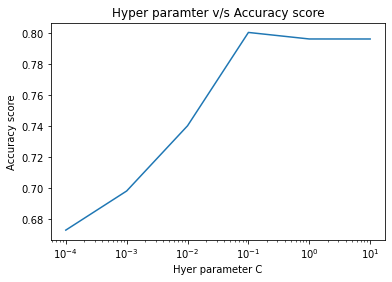

In [51]:
plt.plot(hyperparameter["C"],search.cv_results_["mean_test_score"])
plt.xscale("Log")
plt.xlabel("Hyer parameter C")
plt.ylabel("Accuracy score")
plt.title("Hyper paramter v/s Accuracy score")
plt.show()

**Logistic Regression with Best hyper parameter**

In [52]:
search.best_estimator_

LogisticRegression(C=0.1)

In [53]:
search.best_params_

{'C': 0.1}

In [54]:
model=LogisticRegression(C=search.best_params_["C"])
model.fit(x_train,y_train)

LogisticRegression(C=0.1)

In [55]:
model.coef_

array([[-0.80892896, -0.03431998, -0.22183064, -0.05083368,  0.00530097,
         1.12326015, -1.00966001,  0.03724473,  0.28772321, -0.21136779]])

In [56]:
accuracy1=accuracy_score(y_test,y_pred)

print("Test accuracy f the model is :", np.round(accuracy1*100,4),"%")

Test accuracy f the model is : 80.4469 %


## 9. Using SGD with log loss

In [57]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(loss="log",random_state=12)

In [58]:
hyperparameter={"alpha":[0.0001,0.001,0.01,0.1,1,10]}
search=RandomizedSearchCV(model,hyperparameter,scoring="accuracy",
                          random_state=0)
search.fit(x_train,y_train)

RandomizedSearchCV(estimator=SGDClassifier(loss='log', random_state=12),
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10]},
                   random_state=0, scoring='accuracy')

In [59]:
search.cv_results_

{'mean_fit_time': array([0.10158267, 0.01321363, 0.00628324, 0.00779176, 0.00938077,
        0.00833549]),
 'std_fit_time': array([0.19548923, 0.00660996, 0.00769562, 0.00720489, 0.00765937,
        0.00489192]),
 'mean_score_time': array([0.0095562 , 0.        , 0.00973258, 0.00629821, 0.00152183,
        0.00497284]),
 'std_score_time': array([0.00780906, 0.        , 0.00796357, 0.00771382, 0.00304365,
        0.00639592]),
 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10}],
 'split0_test_score': array([0.79020979, 0.69230769, 0.78321678, 0.74125874, 0.65034965,
        0.65034965]),
 'split1_test_score': array([0.68531469, 0.73426573, 0.71328671, 0.6993007 , 0.67832168,
        0.67832168]),
 'split2_test_score': array([0.64788732, 0

In [60]:
search.best_params_

{'alpha': 0.01}

In [61]:
odel=SGDClassifier(loss="log", alpha=search.best_params_["alpha"],
                    random_state=12)
model.fit(x_train,y_train)

SGDClassifier(loss='log', random_state=12)

In [62]:
model.coef_

array([[ -54.92960185,  -25.33393452, -186.80547178,  -80.74560641,
          11.76317912,  371.47483124, -295.35753327,   68.14069874,
          42.51163416,  -34.53503493]])

In [63]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Test accuracy of the model is :", np.round(accuracy*100,4),"%")

Test accuracy of the model is : 72.6257 %


In [64]:
cm2=confusion_matrix(y_test,y_pred)

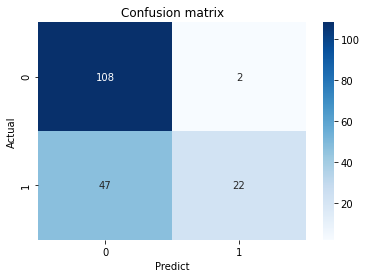

In [65]:
sns.heatmap(cm2,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()